# -----SUBTAREFA 1-----------


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hrishitpatil/flight-data-2024")

print("Path to dataset files:", path)

100%|██████████| 270M/270M [00:02<00:00, 108MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/hrishitpatil/flight-data-2024/versions/2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

print("Bibliotecas carregadas com sucesso!")

Bibliotecas carregadas com sucesso!


In [ ]:
csv_file = os.path.join(path, "flight_data_2024.csv")
df = pd.read_csv(csv_file)

/tmp/ipython-input-3701274810.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7079081 entries, 0 to 7079080
Data columns (total 35 columns):
 #   Column               Dtype  
---  ------               -----  
 0   year                 int64  
 1   month                int64  
 2   day_of_month         int64  
 3   day_of_week          int64  
 4   fl_date              object 
 5   op_unique_carrier    object 
 6   op_carrier_fl_num    float64
 7   origin               object 
 8   origin_city_name     object 
 9   origin_state_nm      object 
 10  dest                 object 
 11  dest_city_name       object 
 12  dest_state_nm        object 
 13  crs_dep_time         int64  
 14  dep_time             float64
 15  dep_delay            float64
 16  taxi_out             float64
 17  wheels_off           float64
 18  wheels_on            float64
 19  taxi_in              float64
 20  crs_arr_time         int64  
 21  arr_time             float64
 22  arr_delay            float64
 23  cancelled            int64  
 24

In [ ]:
#AMOSTRA COM 50 MIL LINHAS PARA FICAR MENOS LENTO

df_amostra = df.sample(n=50000, random_state=42)
print(f"Amostra criada com {len(df_amostra)} linhas")

Amostra criada com 50000 linhas


In [ ]:
# Pega só as colunas numéricas do dataframe
colunas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"Total de colunas numéricas: {len(colunas_numericas)}")
print("\nColunas:")
for col in colunas_numericas:
    print(f"  - {col}")

Total de colunas numéricas: 26

Colunas:
  - year
  - month
  - day_of_month
  - day_of_week
  - op_carrier_fl_num
  - crs_dep_time
  - dep_time
  - dep_delay
  - taxi_out
  - wheels_off
  - wheels_on
  - taxi_in
  - crs_arr_time
  - arr_time
  - arr_delay
  - cancelled
  - diverted
  - crs_elapsed_time
  - actual_elapsed_time
  - air_time
  - distance
  - carrier_delay
  - weather_delay
  - nas_delay
  - security_delay
  - late_aircraft_delay


In [ ]:
# Gera estatísticas descritivas
estatisticas = df[colunas_numericas].describe()
estatisticas

,year,month,day_of_month,day_of_week,op_carrier_fl_num,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,...,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,7079081.0,7.079081e+06,7.079081e+06,7.079081e+06,7.079080e+06,7.079081e+06,6.986422e+06,6.986111e+06,6.983347e+06,6.983347e+06,...,7.079081e+06,7.079080e+06,6.965267e+06,6.965267e+06,7.079081e+06,7.079081e+06,7.079081e+06,7.079081e+06,7.079081e+06,7.079081e+06
mean,2024.0,6.584868e+00,1.578445e+01,3.981945e+00,2.504623e+03,1.327300e+03,1.330765e+03,1.267708e+01,1.790445e+01,1.353542e+03,...,2.471931e-03,1.467665e+02,1.412151e+02,1.149997e+02,8.339062e+02,5.060440e+00,8.752369e-01,2.771828e+00,2.541686e-02,5.929302e+00
std,0.0,3.396806e+00,8.786433e+00,2.012279e+00,1.652253e+03,4.930306e+02,5.094779e+02,5.605997e+01,9.677410e+00,5.120475e+02,...,4.965703e-02,7.238692e+01,7.230781e+01,7.036955e+01,5.962536e+02,3.572703e+01,1.542974e+01,1.546485e+01,1.422602e+00,3.106135e+01
min,2024.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.600000e+01,1.000000e+00,1.000000e+00,...,0.000000e+00,-1.600000e+02,1.500000e+01,5.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2024.0,4.000000e+00,8.000000e+00,2.000000e+00,1.151000e+03,9.050000e+02,9.080000e+02,-6.000000e+00,1.200000e+01,9.240000e+02,...,0.000000e+00,9.300000e+01,8.800000e+01,6.300000e+01,3.990000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2024.0,7.000000e+00,1.600000e+01,4.000000e+00,2.227000e+03,1.320000e+03,1.325000e+03,-2.000000e+00,1.500000e+01,1.338000e+03,...,0.000000e+00,1.300000e+02,1.250000e+02,9.800000e+01,6.800000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2024.0,1.000000e+01,2.300000e+01,6.000000e+00,3.717000e+03,1.736000e+03,1.746000e+03,9.000000e+00,2.100000e+01,1.801000e+03,...,0.000000e+00,1.770000e+02,1.720000e+02,1.450000e+02,1.069000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2024.0,1.200000e+01,3.100000e+01,7.000000e+00,8.819000e+03,2.400000e+03,2.400000e+03,3.777000e+03,2.140000e+02,2.400000e+03,...,1.000000e+00,1.326000e+03,7.920000e+02,7.230000e+02,5.095000e+03,3.689000e+03,1.804000e+03,2.700000e+03,1.164000e+03,2.690000e+03


In [ ]:
# Calcula assimetria de cada coluna
assimetria = df[colunas_numericas].skew()

print("=" * 50)
print("ASSIMETRIA (SKEWNESS) DAS VARIÁVEIS")
print("=" * 50)
print("\n📖 Como interpretar:")
print("   • Valor ≈ 0: distribuição simétrica (normal)")
print("   • Valor > 0: cauda puxada para DIREITA (mais valores baixos)")
print("   • Valor < 0: cauda puxada para ESQUERDA (mais valores altos)")
print("   • |Valor| > 1: assimetria forte")
print("\n" + "-" * 50)

for col in assimetria.index:
    valor = assimetria[col]
    if abs(valor) < 0.5:
        interpretacao = "✅ Simétrica"
    elif abs(valor) < 1:
        interpretacao = "⚠️ Moderada"
    else:
        interpretacao = "🔴 Forte"

    direcao = "→ direita" if valor > 0 else "← esquerda" if valor < 0 else "centro"

    print(f"{col:25} | {valor:8.2f} | {interpretacao} ({direcao})")

ASSIMETRIA (SKEWNESS) DAS VARIÁVEIS

📖 Como interpretar:
   • Valor ≈ 0: distribuição simétrica (normal)
   • Valor > 0: cauda puxada para DIREITA (mais valores baixos)
   • Valor < 0: cauda puxada para ESQUERDA (mais valores altos)
   • |Valor| > 1: assimetria forte

--------------------------------------------------
year                      |     0.00 | ✅ Simétrica (centro)
month                     |    -0.03 | ✅ Simétrica (← esquerda)
day_of_month              |    -0.00 | ✅ Simétrica (← esquerda)
day_of_week               |     0.01 | ✅ Simétrica (→ direita)
op_carrier_fl_num         |     0.47 | ✅ Simétrica (→ direita)
crs_dep_time              |     0.08 | ✅ Simétrica (→ direita)
dep_time                  |     0.03 | ✅ Simétrica (→ direita)
dep_delay                 |    11.06 | 🔴 Forte (→ direita)
taxi_out                  |     3.49 | 🔴 Forte (→ direita)
wheels_off                |    -0.01 | ✅ Simétrica (← esquerda)
wheels_on                 |    -0.34 | ✅ Simétrica (← esqu

Gerando histogramas... (pode demorar um pouco)


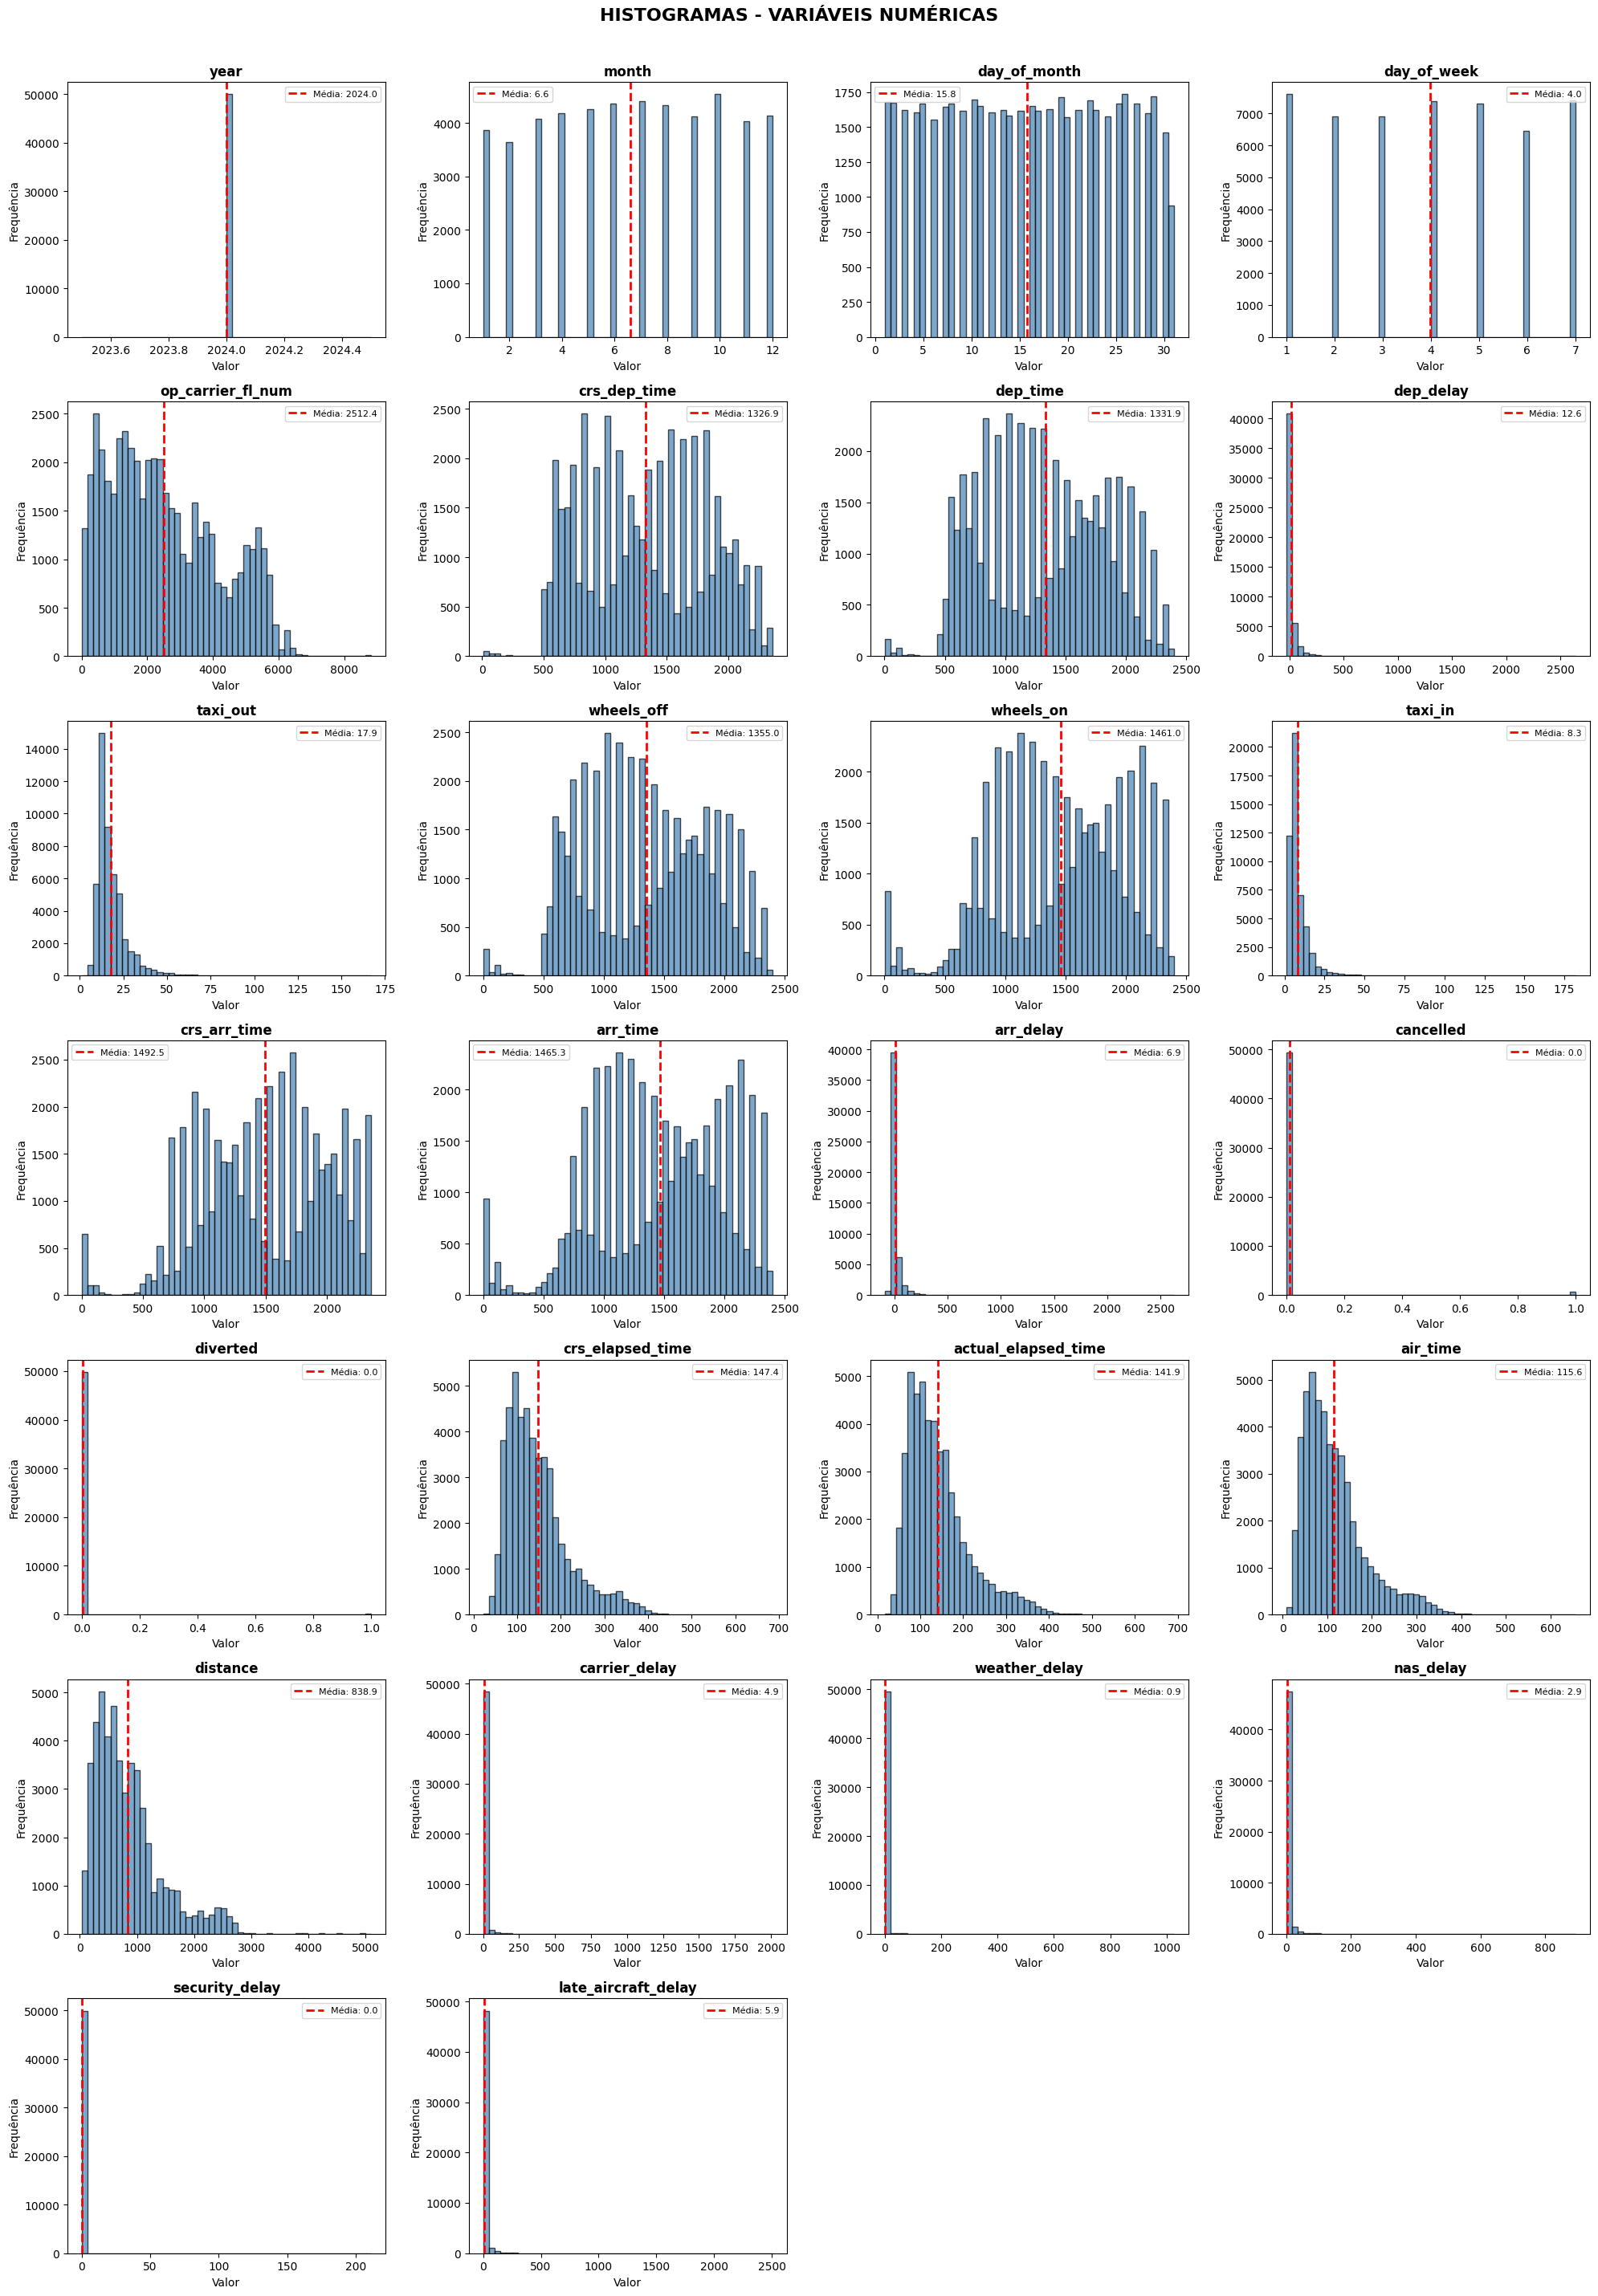


✅ Histogramas gerados!


In [ ]:
# Configura o tamanho da figura
n_cols = 4  # 4 gráficos por linha
n_rows = (len(colunas_numericas) + n_cols - 1) // n_cols  # Calcula linhas necessárias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()  # Transforma em lista simples

print("Gerando histogramas... (pode demorar um pouco)")

for i, col in enumerate(colunas_numericas):
    ax = axes[i]

    # Usa a amostra para o gráfico (mais rápido)
    dados = df_amostra[col].dropna()

    # Cria histograma
    ax.hist(dados, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    ax.set_title(f'{col}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frequência')

    # Adiciona linha da média
    media = dados.mean()
    ax.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Média: {media:.1f}')
    ax.legend(fontsize=8)

# Remove gráficos vazios (se sobrar espaço)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('HISTOGRAMAS - VARIÁVEIS NUMÉRICAS', fontsize=16, fontweight='bold', y=1.02)
plt.show()

print("\n✅ Histogramas gerados!")

# EIXO X valores encontrados
# EIXO Y frequencia com que os valores aparecem

Gerando boxplots... (pode demorar um pouco)


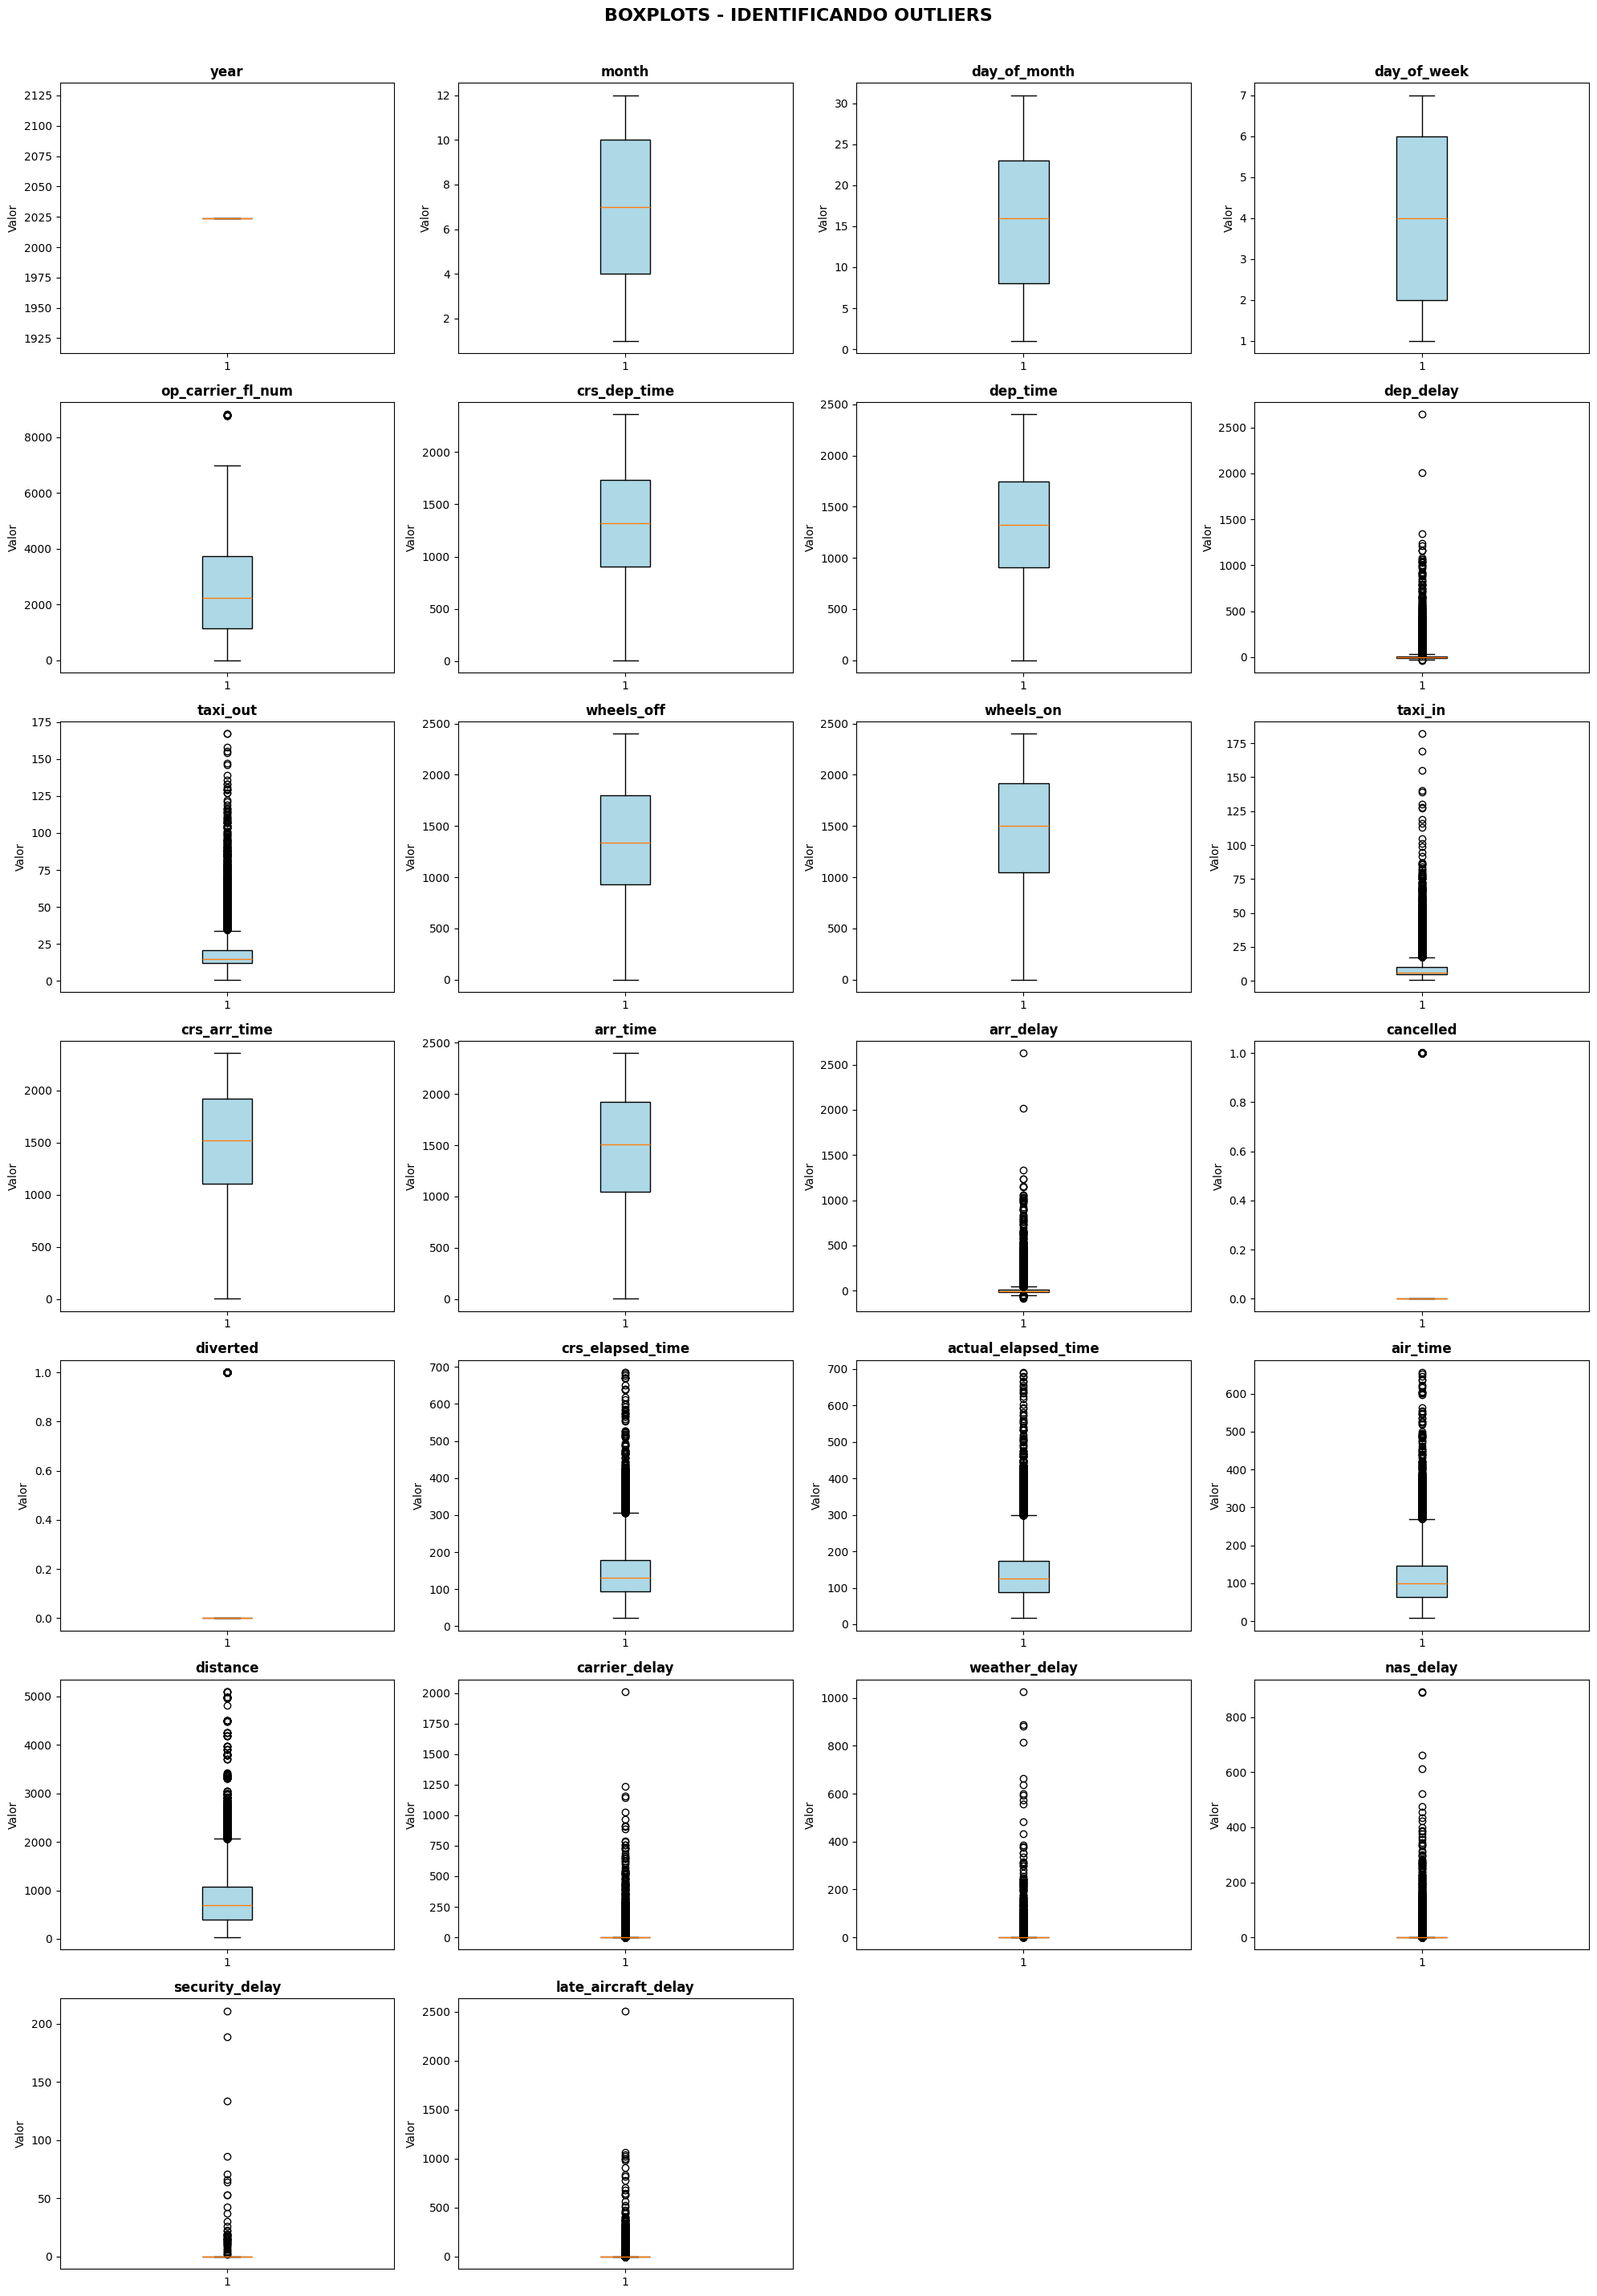


✅ Boxplots gerados!


In [ ]:
#BOXPLOTS

# Configura o tamanho da figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

print("Gerando boxplots... (pode demorar um pouco)")

for i, col in enumerate(colunas_numericas):
    ax = axes[i]

    # Usa a amostra para o gráfico
    dados = df_amostra[col].dropna()

    # Cria boxplot
    bp = ax.boxplot(dados, vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')

    ax.set_title(f'{col}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Valor')

# Remove gráficos vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('BOXPLOTS - IDENTIFICANDO OUTLIERS', fontsize=16, fontweight='bold', y=1.02)
plt.show()

print("\n✅ Boxplots gerados!")

# Como ler o gráfico:

# outliers →    •  •
#                       │
#        máximo   →    ─┬─
#                       │
#        75% (Q3) →   ┌─┴─┐
#                     │   │
#        mediana →    │───│   ← 50% dos dados estão dentro da caixa
#                     │   │
#        25% (Q1) →   └─┬─┘
#                       │
#        mínimo   →    ─┴─
#                       │
#        outliers →    •  •

In [ ]:
# Tabela resumo com todas estatisticas
resumo = pd.DataFrame({
    'Média': df[colunas_numericas].mean(),
    'Mediana': df[colunas_numericas].median(),
    'Desvio Padrão': df[colunas_numericas].std(),
    'Assimetria': df[colunas_numericas].skew(),
    'Mínimo': df[colunas_numericas].min(),
    'Máximo': df[colunas_numericas].max(),
    'Valores Nulos': df[colunas_numericas].isnull().sum(),
    '% Nulos': (df[colunas_numericas].isnull().sum() / len(df) * 100).round(2)
})

print("=" * 70)
print("📊 RESUMO ESTATÍSTICO COMPLETO - VARIÁVEIS NUMÉRICAS")
print("=" * 70)
resumo.round(2)

📊 RESUMO ESTATÍSTICO COMPLETO - VARIÁVEIS NUMÉRICAS


,Média,Mediana,Desvio Padrão,Assimetria,Mínimo,Máximo,Valores Nulos,% Nulos
year,2024.00,2024.0,0.00,0.00,2024.0,2024.0,0,0.00
month,6.58,7.0,3.40,-0.03,1.0,12.0,0,0.00
day_of_month,15.78,16.0,8.79,-0.00,1.0,31.0,0,0.00
day_of_week,3.98,4.0,2.01,0.01,1.0,7.0,0,0.00
op_carrier_fl_num,2504.62,2227.0,1652.25,0.47,1.0,8819.0,1,0.00
crs_dep_time,1327.30,1320.0,493.03,0.08,1.0,2400.0,0,0.00
dep_time,1330.77,1325.0,509.48,0.03,1.0,2400.0,92659,1.31
dep_delay,12.68,-2.0,56.06,11.06,-96.0,3777.0,92970,1.31
taxi_out,17.90,15.0,9.68,3.49,1.0,214.0,95734,1.35
wheels_off,1353.54,1338.0,512.05,-0.01,1.0,2400.0,95734,1.35


# -----SUBTAREFA 2-----------


In [ ]:
# PARTE 1: Identificar e Listar Categóricas
# Seleciona apenas colunas categóricas (tipo object)
colunas_categoricas = df.select_dtypes(include=['object']).columns.tolist()

print("=" * 55)
print("📋 VARIÁVEIS CATEGÓRICAS DO DATASET")
print("=" * 55)
print(f"\nTotal: {len(colunas_categoricas)} colunas\n")

print(f"{'Coluna':<20} {'Categorias Únicas':>18} {'Valores Nulos':>15}")
print("-" * 55)

for col in colunas_categoricas:
    n_unicos = df[col].nunique()
    n_nulos = df[col].isnull().sum()
    print(f"{col:<20} {n_unicos:>18,} {n_nulos:>15,}")

📋 VARIÁVEIS CATEGÓRICAS DO DATASET

Total: 9 colunas

Coluna                Categorias Únicas   Valores Nulos
-------------------------------------------------------
fl_date                             366               0
op_unique_carrier                    15               0
origin                              348               0
origin_city_name                    342               0
origin_state_nm                      52               0
dest                                348               0
dest_city_name                      342               0
dest_state_nm                        52               0
cancellation_code                     4       6,982,766


In [ ]:
# PARTE 2: Frequências e Porcentagens de Cada Categoria
# Célula 2 - Função para analisar cada variável

def analisar_variavel_categorica(df, coluna):
    """
    Analisa uma variável categórica mostrando:
    - Frequência (quantidade)
    - Porcentagem
    - Se é categoria rara (<5%)
    """

    print("\n" + "=" * 65)
    print(f"📊 VARIÁVEL: {coluna.upper()}")
    print("=" * 65)

    # Calcula frequência e porcentagem
    frequencia = df[coluna].value_counts()
    porcentagem = df[coluna].value_counts(normalize=True) * 100

    # Informações gerais
    print(f"\n📈 Resumo:")
    print(f"   • Total de categorias: {len(frequencia)}")
    print(f"   • Valores nulos: {df[coluna].isnull().sum():,}")

    # Monta tabela
    print(f"\n{'Categoria':<30} {'Frequência':>12} {'Porcentagem':>12} {'Status':>10}")
    print("-" * 65)

    for categoria in frequencia.index:
        freq = frequencia[categoria]
        pct = porcentagem[categoria]

        # Identifica se é rara
        if pct < 5:
            status = "⚠️ RARA"
        else:
            status = "✅ OK"

        # Trunca nome se muito longo
        cat_nome = str(categoria)[:28]
        print(f"{cat_nome:<30} {freq:>12,} {pct:>11.2f}% {status:>10}")

    # Resumo das raras
    categorias_raras = porcentagem[porcentagem < 5]
    print("-" * 65)
    print(f"\n⚠️ CATEGORIAS RARAS (<5%):")
    print(f"   • Quantidade: {len(categorias_raras)} de {len(frequencia)} categorias")
    print(f"   • Soma total: {categorias_raras.sum():.2f}% dos dados")

    return frequencia, porcentagem

In [ ]:
# Lista das variáveis para analisar
# Excluímos fl_date (muitas datas únicas) e city_name (muitas cidades)
variaveis_para_analisar = [
    'op_unique_carrier',    # Companhias aéreas
    'origin_state_nm',      # Estados de origem
    'dest_state_nm',        # Estados de destino
    'cancellation_code'     # Códigos de cancelamento
]

# Dicionário para guardar resultados
resultados = {}

for coluna in variaveis_para_analisar:
    freq, pct = analisar_variavel_categorica(df, coluna)
    resultados[coluna] = {'frequencia': freq, 'porcentagem': pct}


📊 VARIÁVEL: OP_UNIQUE_CARRIER

📈 Resumo:
   • Total de categorias: 15
   • Valores nulos: 0

Categoria                        Frequência  Porcentagem     Status
-----------------------------------------------------------------
WN                                1,419,419       20.05%       ✅ OK
DL                                1,009,194       14.26%       ✅ OK
AA                                  984,306       13.90%       ✅ OK
UA                                  760,451       10.74%       ✅ OK
OO                                  744,658       10.52%       ✅ OK
YX                                  301,465        4.26%    ⚠️ RARA
MQ                                  279,955        3.95%    ⚠️ RARA
NK                                  261,103        3.69%    ⚠️ RARA
AS                                  245,819        3.47%    ⚠️ RARA
B6                                  240,282        3.39%    ⚠️ RARA
OH                                  227,971        3.22%    ⚠️ RARA
F9                      

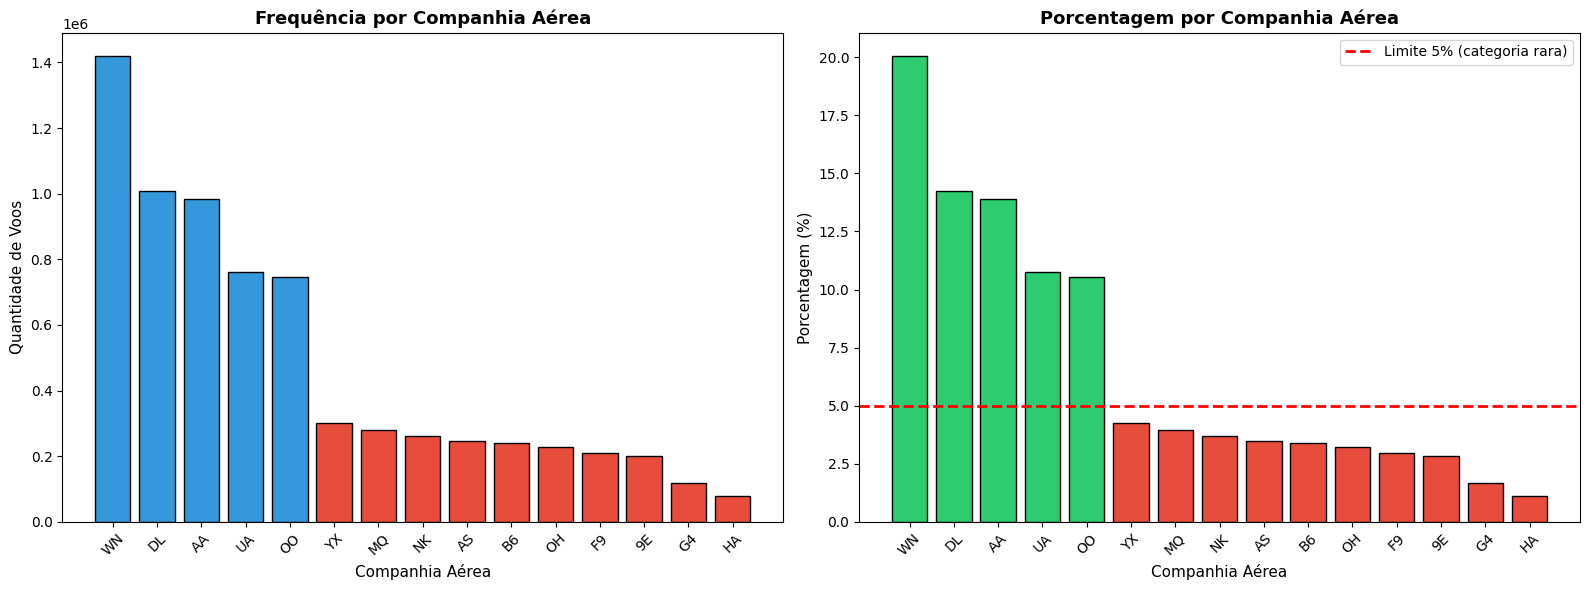


🔴 Vermelho = Categoria RARA (<5%)
🔵🟢 Azul/Verde = Categoria com frequência adequada


In [ ]:
# graficos de barras para frequencias
# grafico de companhias aereas

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Dados
freq = df['op_unique_carrier'].value_counts()
pct = df['op_unique_carrier'].value_counts(normalize=True) * 100

# Gráfico de barras - Frequência
ax1 = axes[0]
cores = ['#e74c3c' if pct[cat] < 5 else '#3498db' for cat in freq.index]
barras = ax1.bar(freq.index, freq.values, color=cores, edgecolor='black')
ax1.set_xlabel('Companhia Aérea', fontsize=11)
ax1.set_ylabel('Quantidade de Voos', fontsize=11)
ax1.set_title('Frequência por Companhia Aérea', fontsize=13, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)

# Gráfico de barras - Porcentagem
ax2 = axes[1]
cores = ['#e74c3c' if p < 5 else '#2ecc71' for p in pct.values]
barras = ax2.bar(pct.index, pct.values, color=cores, edgecolor='black')
ax2.set_xlabel('Companhia Aérea', fontsize=11)
ax2.set_ylabel('Porcentagem (%)', fontsize=11)
ax2.set_title('Porcentagem por Companhia Aérea', fontsize=13, fontweight='bold')
ax2.axhline(y=5, color='red', linestyle='--', linewidth=2, label='Limite 5% (categoria rara)')
ax2.legend()
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n🔴 Vermelho = Categoria RARA (<5%)")
print("🔵🟢 Azul/Verde = Categoria com frequência adequada")

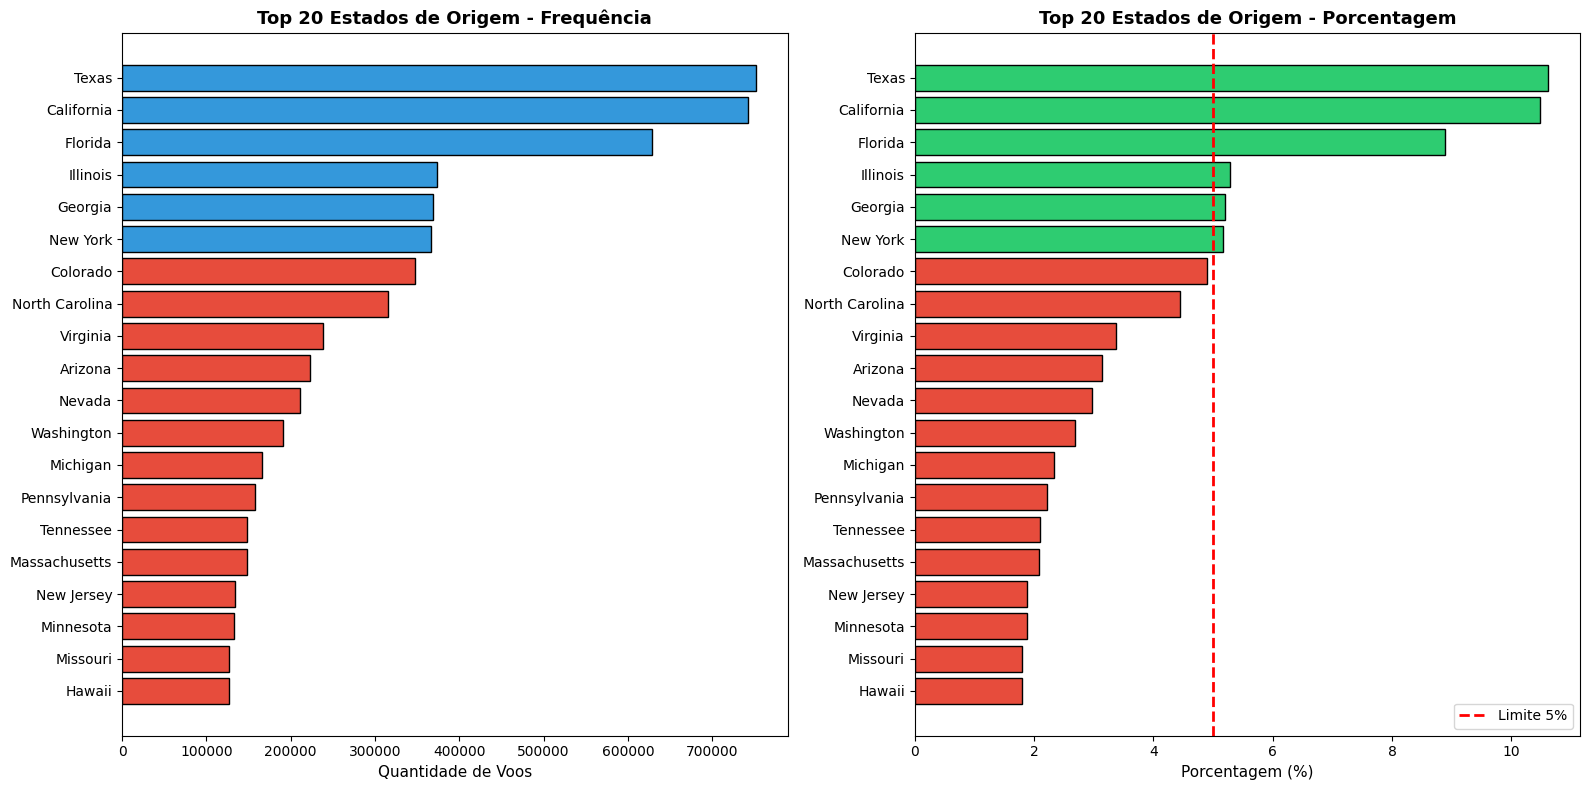

In [ ]:
# grafico de estados de origem ( top 20 )

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Dados - Top 20 estados
freq = df['origin_state_nm'].value_counts().head(20)
pct = (df['origin_state_nm'].value_counts(normalize=True) * 100).head(20)

# Gráfico horizontal - Frequência
ax1 = axes[0]
cores = ['#e74c3c' if pct[estado] < 5 else '#3498db' for estado in freq.index]
ax1.barh(freq.index[::-1], freq.values[::-1], color=cores[::-1], edgecolor='black')
ax1.set_xlabel('Quantidade de Voos', fontsize=11)
ax1.set_title('Top 20 Estados de Origem - Frequência', fontsize=13, fontweight='bold')

# Gráfico horizontal - Porcentagem
ax2 = axes[1]
cores = ['#e74c3c' if p < 5 else '#2ecc71' for p in pct.values]
ax2.barh(pct.index[::-1], pct.values[::-1], color=cores[::-1], edgecolor='black')
ax2.set_xlabel('Porcentagem (%)', fontsize=11)
ax2.set_title('Top 20 Estados de Origem - Porcentagem', fontsize=13, fontweight='bold')
ax2.axvline(x=5, color='red', linestyle='--', linewidth=2, label='Limite 5%')
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
# resumo de categorias raras

print("=" * 70)
print("⚠️  RESUMO: CATEGORIAS RARAS (<5% de frequência)")
print("=" * 70)

variaveis_verificar = ['op_unique_carrier', 'origin', 'dest',
                       'origin_state_nm', 'dest_state_nm']

for coluna in variaveis_verificar:
    pct = df[coluna].value_counts(normalize=True) * 100

    # Categorias raras
    raras = pct[pct < 5]
    normais = pct[pct >= 5]

    print(f"\n📊 {coluna}:")
    print(f"   • Total de categorias: {len(pct)}")
    print(f"   • Categorias normais (≥5%): {len(normais)}")
    print(f"   • Categorias raras (<5%): {len(raras)}")
    print(f"   • % dos dados em categorias raras: {raras.sum():.2f}%")

⚠️  RESUMO: CATEGORIAS RARAS (<5% de frequência)

📊 op_unique_carrier:
   • Total de categorias: 15
   • Categorias normais (≥5%): 5
   • Categorias raras (<5%): 10
   • % dos dados em categorias raras: 30.53%

📊 origin:
   • Total de categorias: 348
   • Categorias normais (≥5%): 0
   • Categorias raras (<5%): 348
   • % dos dados em categorias raras: 100.00%

📊 dest:
   • Total de categorias: 348
   • Categorias normais (≥5%): 0
   • Categorias raras (<5%): 348
   • % dos dados em categorias raras: 100.00%

📊 origin_state_nm:
   • Total de categorias: 52
   • Categorias normais (≥5%): 6
   • Categorias raras (<5%): 46
   • % dos dados em categorias raras: 54.36%

📊 dest_state_nm:
   • Total de categorias: 52
   • Categorias normais (≥5%): 6
   • Categorias raras (<5%): 46
   • % dos dados em categorias raras: 54.36%


# -----SUBTAREFA 3-----------


In [ ]:
# Define o que é "atraso"
# Vamos considerar: atraso >= 15 minutos na CHEGADA = Atrasado
LIMITE_ATRASO = 15  # minutos ( aqui podemos colocar em minutos qualquer tempo.. )

# Cria a variável alvo
# 1 = Atrasado | 0 = Pontual
df['atraso'] = (df['arr_delay'] >= LIMITE_ATRASO).astype(int)

# Faz o mesmo na amostra
df_amostra['atraso'] = (df_amostra['arr_delay'] >= LIMITE_ATRASO).astype(int)

print("✅ Variável 'atraso' criada!")
print(f"\n📖 Critério: voo com arr_delay >= {LIMITE_ATRASO} minutos = Atrasado")
print(f"\nValores únicos: {df['atraso'].unique()}")

✅ Variável 'atraso' criada!

📖 Critério: voo com arr_delay >= 15 minutos = Atrasado

Valores únicos: [0 1]


In [ ]:
# ANÁLISE DA VARIÁVEL ALVO:

# Conta quantos voos em cada classe
contagem = df['atraso'].value_counts()
percentual = df['atraso'].value_counts(normalize=True) * 100

print("=" * 50)
print("📊 DISTRIBUIÇÃO DA VARIÁVEL ALVO")
print("=" * 50)

print(f"\n{'Classe':<15} {'Quantidade':>15} {'Percentual':>12}")
print("-" * 45)
print(f"{'Pontual (0)':<15} {contagem.get(0, 0):>15,} {percentual.get(0, 0):>11.2f}%")
print(f"{'Atrasado (1)':<15} {contagem.get(1, 0):>15,} {percentual.get(1, 0):>11.2f}%")
print("-" * 45)
print(f"{'TOTAL':<15} {len(df):>15,} {'100.00':>11}%")

# Verifica balanceamento
razao = contagem.min() / contagem.max()
print(f"\n📈 Razão entre classes: {razao:.2f}")

if razao >= 0.8:
    print("✅ Dataset BALANCEADO (classes proporcionais)")
elif razao >= 0.5:
    print("⚠️ Dataset LEVEMENTE DESBALANCEADO")
elif razao >= 0.2:
    print("⚠️ Dataset MODERADAMENTE DESBALANCEADO")
else:
    print("🔴 Dataset MUITO DESBALANCEADO (pode precisar de técnicas especiais)")

📊 DISTRIBUIÇÃO DA VARIÁVEL ALVO

Classe               Quantidade   Percentual
---------------------------------------------
Pontual (0)           5,629,109       79.52%
Atrasado (1)          1,449,972       20.48%
---------------------------------------------
TOTAL                 7,079,081      100.00%

📈 Razão entre classes: 0.26
⚠️ Dataset MODERADAMENTE DESBALANCEADO


In [ ]:
#distribuição das classes

# Remove valores nulos da variável alvo para análise limpa
df_validos = df.dropna(subset=['arr_delay'])

# Recalcula a variável alvo só com dados válidos
df_validos['atraso'] = (df_validos['arr_delay'] >= LIMITE_ATRASO).astype(int)

# Contagem de cada classe
contagem = df_validos['atraso'].value_counts().sort_index()
porcentagem = df_validos['atraso'].value_counts(normalize=True).sort_index() * 100

print("=" * 55)
print("📊 DISTRIBUIÇÃO DAS CLASSES")
print("=" * 55)

print(f"\n{'Classe':<20} {'Quantidade':>15} {'Porcentagem':>15}")
print("-" * 55)
print(f"{'0 - Pontual':<20} {contagem[0]:>15,} {porcentagem[0]:>14.2f}%")
print(f"{'1 - Atrasado':<20} {contagem[1]:>15,} {porcentagem[1]:>14.2f}%")
print("-" * 55)
print(f"{'TOTAL':<20} {len(df_validos):>15,} {'100.00':>14}%")

📊 DISTRIBUIÇÃO DAS CLASSES

Classe                    Quantidade     Porcentagem
-------------------------------------------------------
0 - Pontual                5,515,295          79.18%
1 - Atrasado               1,449,972          20.82%
-------------------------------------------------------
TOTAL                      6,965,267         100.00%


/tmp/ipython-input-2468981479.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_validos['atraso'] = (df_validos['arr_delay'] >= LIMITE_ATRASO).astype(int)


In [ ]:
#balanceamento do dataset

print("\n" + "=" * 55)
print("⚖️  ANÁLISE DE BALANCEAMENTO")
print("=" * 55)

# Calcula razão entre classes
classe_menor = contagem.min()
classe_maior = contagem.max()
razao = classe_menor / classe_maior

print(f"\n📈 Métricas de balanceamento:")
print(f"   • Classe majoritária: {'Pontual' if contagem[0] > contagem[1] else 'Atrasado'}")
print(f"   • Classe minoritária: {'Atrasado' if contagem[0] > contagem[1] else 'Pontual'}")
print(f"   • Razão (menor/maior): {razao:.4f}")
print(f"   • Proporção: 1 : {1/razao:.2f}")

# Interpreta o balanceamento
print(f"\n🔍 Interpretação:")
if razao >= 0.8:
    status = "✅ BALANCEADO"
    explicacao = "Classes bem proporcionais. Ótimo para treinar modelos!"
elif razao >= 0.5:
    status = "⚠️ LEVEMENTE DESBALANCEADO"
    explicacao = "Diferença aceitável. Modelo deve funcionar bem."
elif razao >= 0.25:
    status = "⚠️ MODERADAMENTE DESBALANCEADO"
    explicacao = "Considere técnicas de balanceamento (SMOTE, undersampling)."
else:
    status = "🔴 MUITO DESBALANCEADO"
    explicacao = "Requer técnicas especiais para não enviesar o modelo."

print(f"   Status: {status}")
print(f"   {explicacao}")


⚖️  ANÁLISE DE BALANCEAMENTO

📈 Métricas de balanceamento:
   • Classe majoritária: Pontual
   • Classe minoritária: Atrasado
   • Razão (menor/maior): 0.2629
   • Proporção: 1 : 3.80

🔍 Interpretação:
   Status: ⚠️ MODERADAMENTE DESBALANCEADO
   Considere técnicas de balanceamento (SMOTE, undersampling).


In [ ]:
# taxa de atrasos:


print("\n" + "=" * 55)
print("📉 TAXA DE ATRASOS")
print("=" * 55)

# Calcula taxa
taxa_atraso = (contagem[1] / len(df_validos)) * 100
taxa_pontual = (contagem[0] / len(df_validos)) * 100

print(f"\n🎯 Taxa geral de atrasos: {taxa_atraso:.2f}%")
print(f"   (ou seja, {taxa_atraso:.2f} em cada 100 voos atrasam)")

print(f"\n✈️ Taxa de voos pontuais: {taxa_pontual:.2f}%")

# Contexto adicional
print(f"\n📊 Em números absolutos:")
print(f"   • De {len(df_validos):,} voos analisados")
print(f"   • {contagem[1]:,} chegaram com atraso ≥ 15 min")
print(f"   • {contagem[0]:,} chegaram no horário ou com atraso < 15 min")


📉 TAXA DE ATRASOS

🎯 Taxa geral de atrasos: 20.82%
   (ou seja, 20.82 em cada 100 voos atrasam)

✈️ Taxa de voos pontuais: 79.18%

📊 Em números absolutos:
   • De 6,965,267 voos analisados
   • 1,449,972 chegaram com atraso ≥ 15 min
   • 5,515,295 chegaram no horário ou com atraso < 15 min


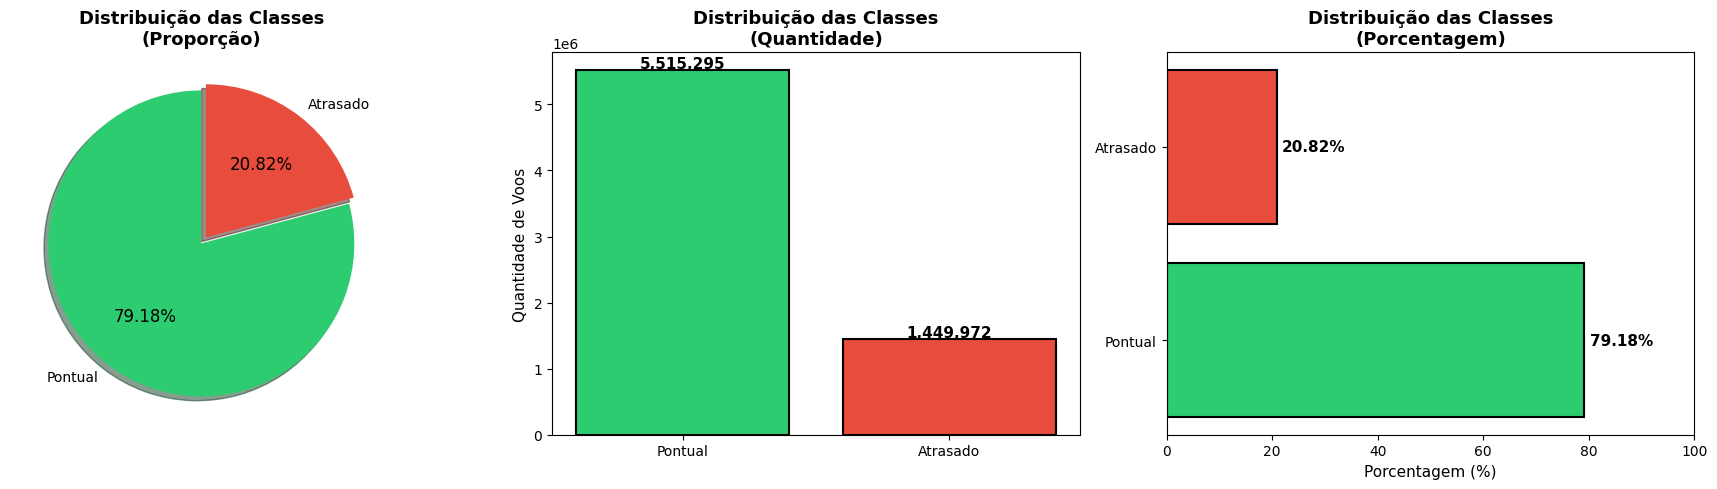


✅ Gráficos gerados!


In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

cores = ['#2ecc71', '#e74c3c']  # Verde = Pontual, Vermelho = Atrasado
labels = ['Pontual', 'Atrasado']

# Gráfico 1: Pizza
ax1 = axes[0]
wedges, texts, autotexts = ax1.pie(
    contagem.values,
    labels=labels,
    autopct='%1.2f%%',
    colors=cores,
    explode=(0, 0.05),
    shadow=True,
    startangle=90
)
autotexts[0].set_fontsize(12)
autotexts[1].set_fontsize(12)
ax1.set_title('Distribuição das Classes\n(Proporção)', fontsize=13, fontweight='bold')

# Gráfico 2: Barras verticais
ax2 = axes[1]
barras = ax2.bar(labels, contagem.values, color=cores, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Quantidade de Voos', fontsize=11)
ax2.set_title('Distribuição das Classes\n(Quantidade)', fontsize=13, fontweight='bold')

# Adiciona valores nas barras
for barra, valor in zip(barras, contagem.values):
    ax2.text(barra.get_x() + barra.get_width()/2, barra.get_height() + 30000,
             f'{valor:,}', ha='center', fontsize=11, fontweight='bold')

# Gráfico 3: Barras horizontais com porcentagem
ax3 = axes[2]
barras = ax3.barh(labels, porcentagem.values, color=cores, edgecolor='black', linewidth=1.5)
ax3.set_xlabel('Porcentagem (%)', fontsize=11)
ax3.set_title('Distribuição das Classes\n(Porcentagem)', fontsize=13, fontweight='bold')
ax3.set_xlim(0, 100)

# Adiciona valores nas barras
for barra, valor in zip(barras, porcentagem.values):
    ax3.text(barra.get_width() + 1, barra.get_y() + barra.get_height()/2,
             f'{valor:.2f}%', va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Gráficos gerados!")



```
*   histogramas e boxplots organizados
*   graficos de barras para categoricas
*   analise de balanceamento
*   insights sobre padroes encontrados


```

# dashboard

/tmp/ipython-input-760729263.py:191: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/tmp/ipython-input-760729263.py:191: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/tmp/ipython-input-760729263.py:191: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/tmp/ipython-input-760729263.py:191: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/tmp/ipython-input-760729263.py:191: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.pri

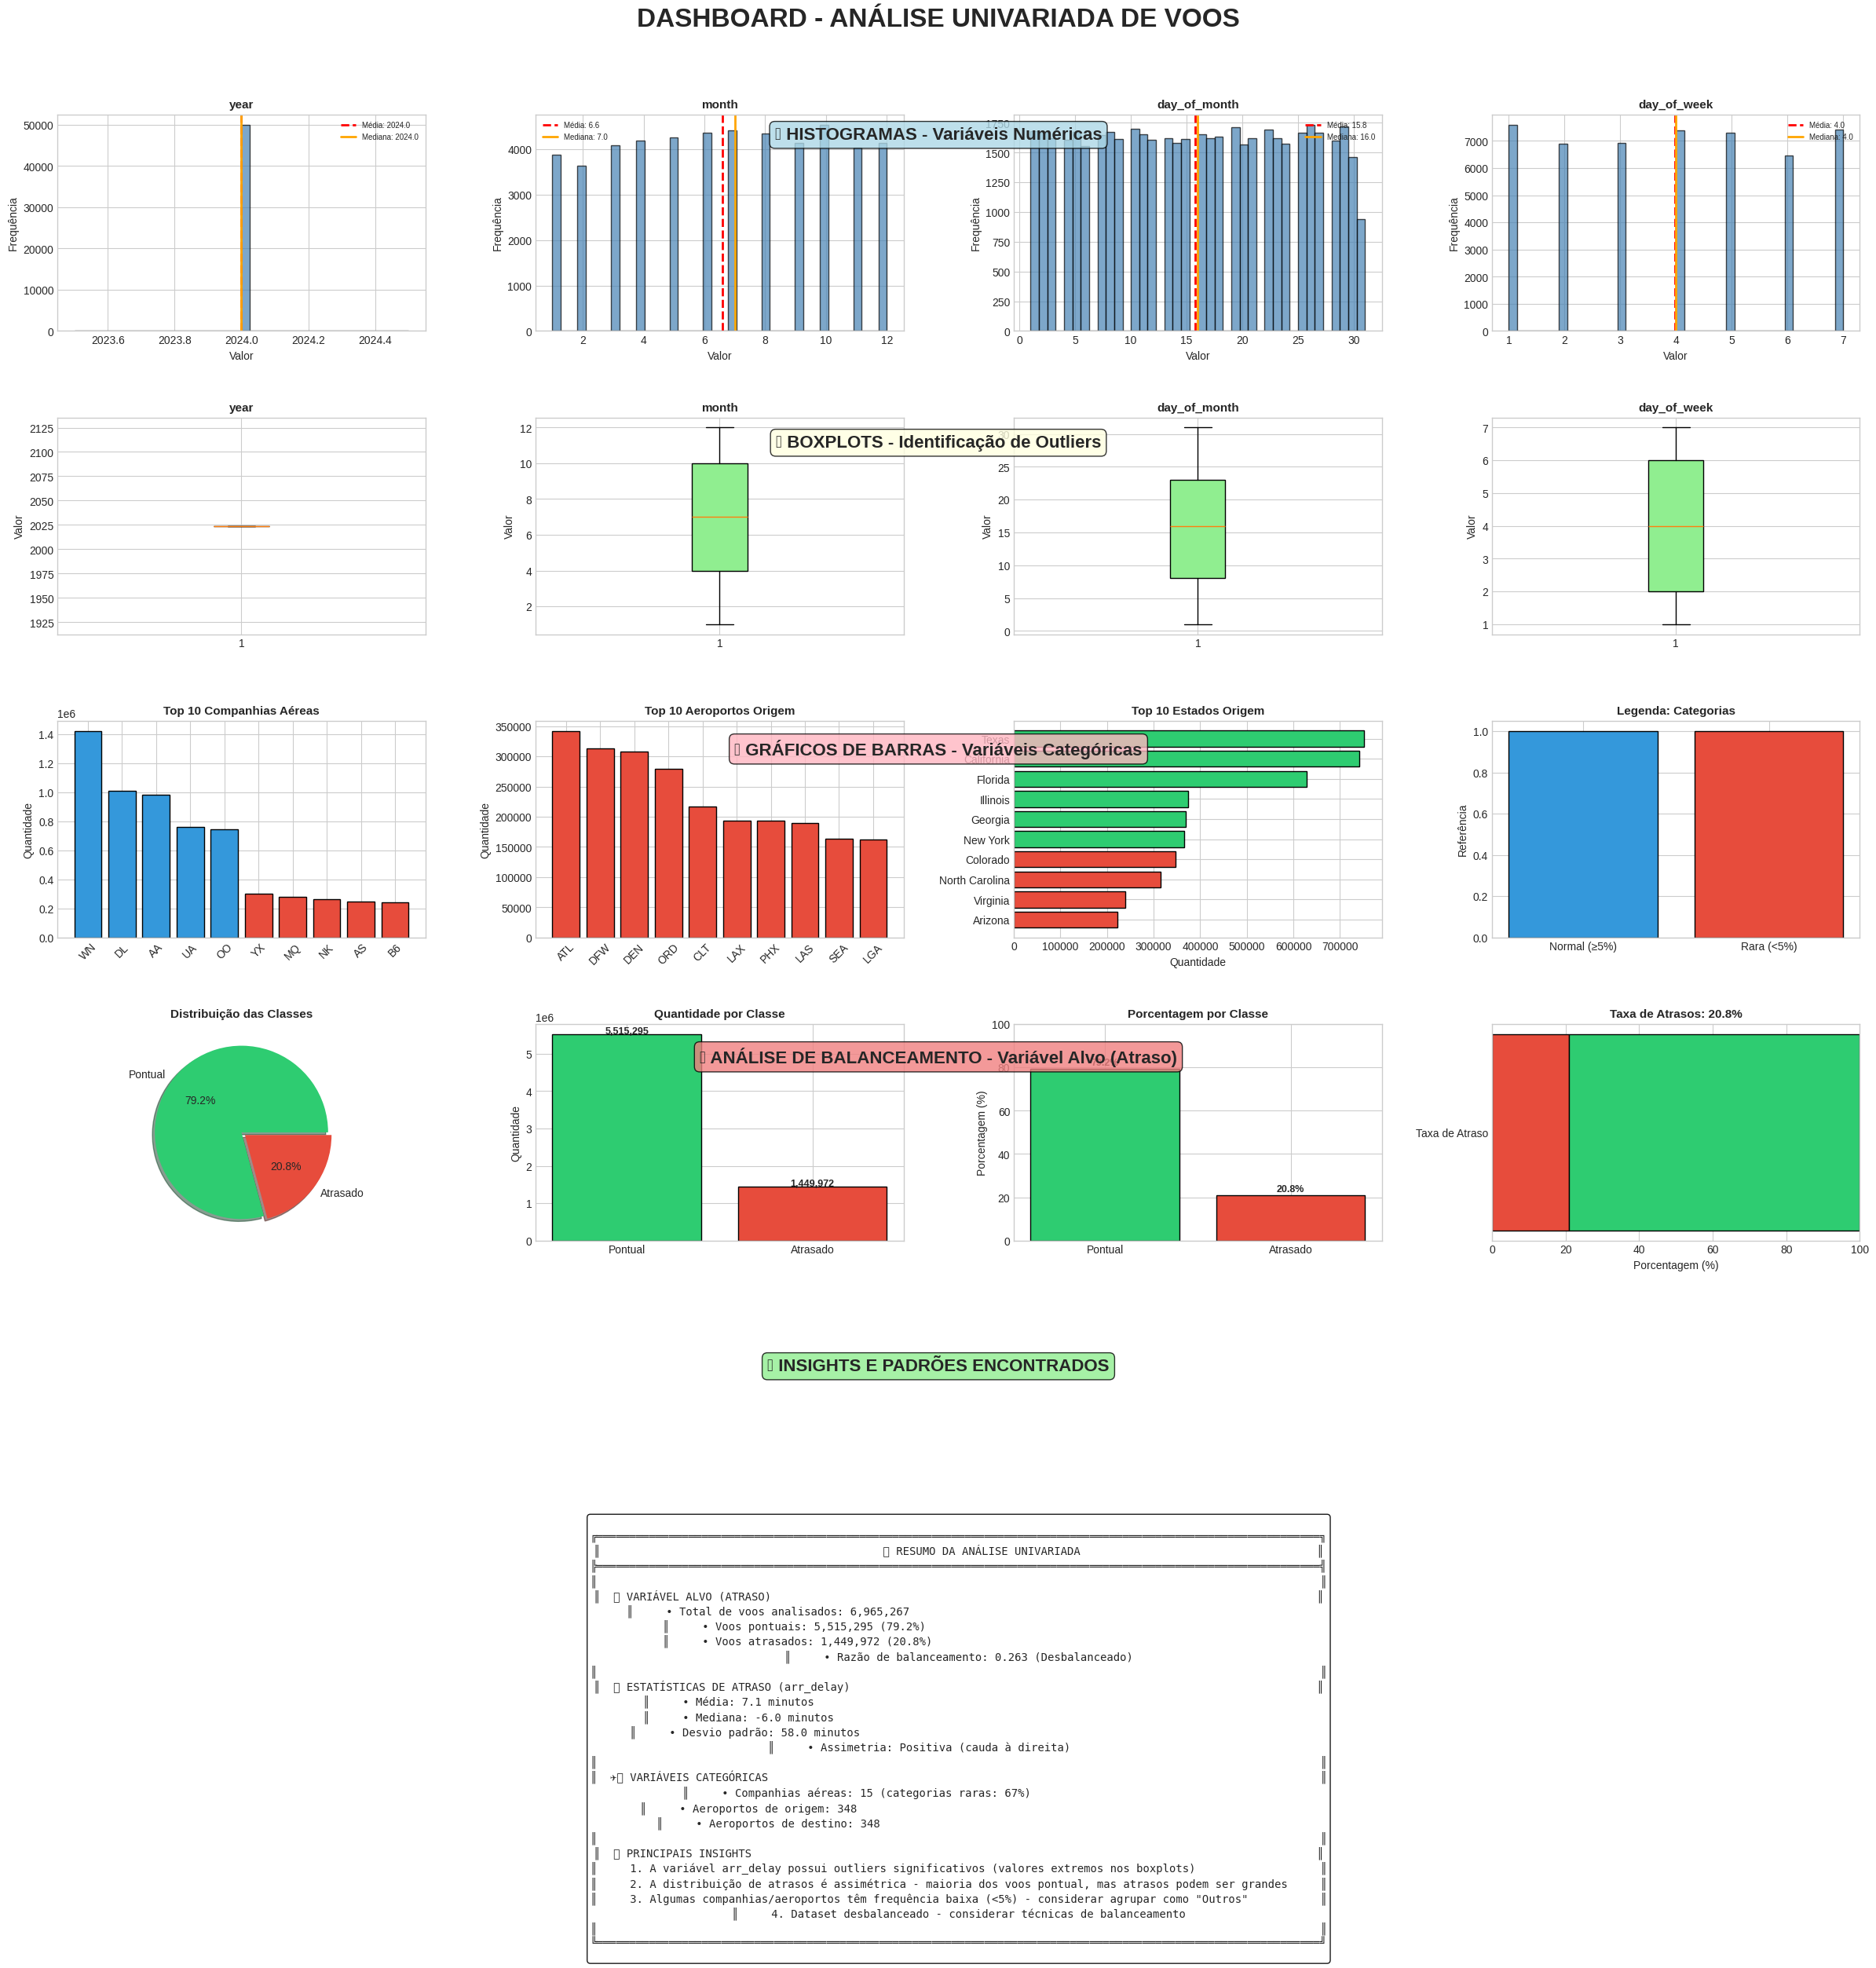


✅ Dashboard gerado com sucesso!


In [ ]:
# Configura o estilo
plt.style.use('seaborn-v0_8-whitegrid')

# Cria figura grande
fig = plt.figure(figsize=(24, 28))

# Define o título principal do Dashboard
fig.suptitle('DASHBOARD - ANÁLISE UNIVARIADA DE VOOS',
             fontsize=24, fontweight='bold', y=0.98)

# =============================================================
# SEÇÃO 1: HISTOGRAMAS (variáveis numéricas principais)
# =============================================================

# Subtítulo da seção
fig.text(0.5, 0.92, '📊 HISTOGRAMAS - Variáveis Numéricas',
         fontsize=16, fontweight='bold', ha='center',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

for i, col in enumerate(colunas_numericas[:4]):
    ax = fig.add_subplot(7, 4, i + 1)
    dados = df_amostra[col].dropna()
    ax.hist(dados, bins=40, color='steelblue', edgecolor='black', alpha=0.7)
    ax.axvline(dados.mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {dados.mean():.1f}')
    ax.axvline(dados.median(), color='orange', linestyle='-', linewidth=2, label=f'Mediana: {dados.median():.1f}')
    ax.set_title(col, fontsize=11, fontweight='bold')
    ax.legend(fontsize=7)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frequência')

# =============================================================
# SEÇÃO 2: BOXPLOTS (identificar outliers)
# =============================================================

fig.text(0.5, 0.78, '📦 BOXPLOTS - Identificação de Outliers',
         fontsize=16, fontweight='bold', ha='center',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

for i, col in enumerate(colunas_numericas[:4]):
    ax = fig.add_subplot(7, 4, i + 5)
    dados = df_amostra[col].dropna()
    bp = ax.boxplot(dados, vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightgreen')
    ax.set_title(col, fontsize=11, fontweight='bold')
    ax.set_ylabel('Valor')

# =============================================================
# SEÇÃO 3: GRÁFICOS DE BARRAS (variáveis categóricas)
# =============================================================

fig.text(0.5, 0.64, '📋 GRÁFICOS DE BARRAS - Variáveis Categóricas',
         fontsize=16, fontweight='bold', ha='center',
         bbox=dict(boxstyle='round', facecolor='lightpink', alpha=0.8))

# Companhias Aéreas
ax9 = fig.add_subplot(7, 4, 9)
top_cias = df['op_unique_carrier'].value_counts().head(10)
cores_cias = ['#e74c3c' if (v/len(df)*100) < 5 else '#3498db' for v in top_cias.values]
ax9.bar(top_cias.index, top_cias.values, color=cores_cias, edgecolor='black')
ax9.set_title('Top 10 Companhias Aéreas', fontsize=11, fontweight='bold')
ax9.tick_params(axis='x', rotation=45)
ax9.set_ylabel('Quantidade')

# Aeroportos Origem
ax10 = fig.add_subplot(7, 4, 10)
top_origem = df['origin'].value_counts().head(10)
cores_orig = ['#e74c3c' if (v/len(df)*100) < 5 else '#9b59b6' for v in top_origem.values]
ax10.bar(top_origem.index, top_origem.values, color=cores_orig, edgecolor='black')
ax10.set_title('Top 10 Aeroportos Origem', fontsize=11, fontweight='bold')
ax10.tick_params(axis='x', rotation=45)
ax10.set_ylabel('Quantidade')

# Estados Origem
ax11 = fig.add_subplot(7, 4, 11)
top_estados = df['origin_state_nm'].value_counts().head(10)
cores_est = ['#e74c3c' if (v/len(df)*100) < 5 else '#2ecc71' for v in top_estados.values]
ax11.barh(top_estados.index[::-1], top_estados.values[::-1], color=cores_est[::-1], edgecolor='black')
ax11.set_title('Top 10 Estados Origem', fontsize=11, fontweight='bold')
ax11.set_xlabel('Quantidade')

# Legenda das cores
ax12 = fig.add_subplot(7, 4, 12)
ax12.bar(['Normal (≥5%)', 'Rara (<5%)'], [1, 1], color=['#3498db', '#e74c3c'], edgecolor='black')
ax12.set_title('Legenda: Categorias', fontsize=11, fontweight='bold')
ax12.set_ylabel('Referência')

# =============================================================
# SEÇÃO 4: ANÁLISE DE BALANCEAMENTO (variável alvo)
# =============================================================

fig.text(0.5, 0.50, '🎯 ANÁLISE DE BALANCEAMENTO - Variável Alvo (Atraso)',
         fontsize=16, fontweight='bold', ha='center',
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))

contagem = df_validos['atraso'].value_counts().sort_index()
porcentagem = df_validos['atraso'].value_counts(normalize=True).sort_index() * 100
cores_alvo = ['#2ecc71', '#e74c3c']
labels_alvo = ['Pontual', 'Atrasado']

# Pizza
ax13 = fig.add_subplot(7, 4, 13)
ax13.pie(contagem.values, labels=labels_alvo, autopct='%1.1f%%',
         colors=cores_alvo, explode=(0, 0.05), shadow=True)
ax13.set_title('Distribuição das Classes', fontsize=11, fontweight='bold')

# Barras quantidade
ax14 = fig.add_subplot(7, 4, 14)
barras = ax14.bar(labels_alvo, contagem.values, color=cores_alvo, edgecolor='black')
ax14.set_title('Quantidade por Classe', fontsize=11, fontweight='bold')
ax14.set_ylabel('Quantidade')
for barra, valor in zip(barras, contagem.values):
    ax14.text(barra.get_x() + barra.get_width()/2, barra.get_height() + 20000,
              f'{valor:,}', ha='center', fontsize=9, fontweight='bold')

# Barras porcentagem
ax15 = fig.add_subplot(7, 4, 15)
barras = ax15.bar(labels_alvo, porcentagem.values, color=cores_alvo, edgecolor='black')
ax15.set_title('Porcentagem por Classe', fontsize=11, fontweight='bold')
ax15.set_ylabel('Porcentagem (%)')
ax15.set_ylim(0, 100)
for barra, valor in zip(barras, porcentagem.values):
    ax15.text(barra.get_x() + barra.get_width()/2, barra.get_height() + 2,
              f'{valor:.1f}%', ha='center', fontsize=9, fontweight='bold')

# Taxa de atraso visual
ax16 = fig.add_subplot(7, 4, 16)
taxa = porcentagem[1]
ax16.barh(['Taxa de Atraso'], [taxa], color='#e74c3c', edgecolor='black')
ax16.barh(['Taxa de Atraso'], [100-taxa], left=[taxa], color='#2ecc71', edgecolor='black')
ax16.set_xlim(0, 100)
ax16.set_title(f'Taxa de Atrasos: {taxa:.1f}%', fontsize=11, fontweight='bold')
ax16.set_xlabel('Porcentagem (%)')

# =============================================================
# SEÇÃO 5: INSIGHTS E ESTATÍSTICAS
# =============================================================

fig.text(0.5, 0.36, '💡 INSIGHTS E PADRÕES ENCONTRADOS',
         fontsize=16, fontweight='bold', ha='center',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# Calcula estatísticas para os insights
razao_balance = contagem.min() / contagem.max()
media_atraso = df_validos['arr_delay'].mean()
mediana_atraso = df_validos['arr_delay'].median()
std_atraso = df_validos['arr_delay'].std()
total_cias = df['op_unique_carrier'].nunique()
total_aeroportos = df['origin'].nunique()
pct_raras_cias = (df['op_unique_carrier'].value_counts(normalize=True) < 0.05).sum() / total_cias * 100

# Caixa de texto com insights
ax_insights = fig.add_subplot(7, 1, 6)
ax_insights.axis('off')

insights_texto = f"""
╔══════════════════════════════════════════════════════════════════════════════════════════════════════════════╗
║                                           📊 RESUMO DA ANÁLISE UNIVARIADA                                    ║
╠══════════════════════════════════════════════════════════════════════════════════════════════════════════════╣
║                                                                                                              ║
║  🎯 VARIÁVEL ALVO (ATRASO)                                                                                   ║
║     • Total de voos analisados: {len(df_validos):,}
║     • Voos pontuais: {contagem[0]:,} ({porcentagem[0]:.1f}%)
║     • Voos atrasados: {contagem[1]:,} ({porcentagem[1]:.1f}%)
║     • Razão de balanceamento: {razao_balance:.3f} ({'Balanceado' if razao_balance > 0.5 else 'Desbalanceado'})
║                                                                                                              ║
║  📈 ESTATÍSTICAS DE ATRASO (arr_delay)                                                                       ║
║     • Média: {media_atraso:.1f} minutos
║     • Mediana: {mediana_atraso:.1f} minutos
║     • Desvio padrão: {std_atraso:.1f} minutos
║     • Assimetria: {'Positiva (cauda à direita)' if media_atraso > mediana_atraso else 'Negativa'}
║                                                                                                              ║
║  ✈️ VARIÁVEIS CATEGÓRICAS                                                                                    ║
║     • Companhias aéreas: {total_cias} (categorias raras: {pct_raras_cias:.0f}%)
║     • Aeroportos de origem: {total_aeroportos}
║     • Aeroportos de destino: {df['dest'].nunique()}
║                                                                                                              ║
║  💡 PRINCIPAIS INSIGHTS                                                                                      ║
║     1. A variável arr_delay possui outliers significativos (valores extremos nos boxplots)                   ║
║     2. A distribuição de atrasos é assimétrica - maioria dos voos pontual, mas atrasos podem ser grandes     ║
║     3. Algumas companhias/aeroportos têm frequência baixa (<5%) - considerar agrupar como "Outros"           ║
║     4. Dataset {'balanceado' if razao_balance > 0.5 else 'desbalanceado'} - {'OK para modelagem' if razao_balance > 0.5 else 'considerar técnicas de balanceamento'}
║                                                                                                              ║
╚══════════════════════════════════════════════════════════════════════════════════════════════════════════════╝
"""

ax_insights.text(0.5, 0.5, insights_texto, transform=ax_insights.transAxes,
                 fontsize=10, fontfamily='monospace', verticalalignment='center',
                 horizontalalignment='center',
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

print("\n✅ Dashboard gerado com sucesso!")
